In [33]:
indir='./results/ae_train_1kg_val_1kg_f0'
epoch=107
indir='./results/f0_ae'
epoch=477
# indir='./results/ae'
# epoch=174

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
fn = f'{indir}/confusion_matrix_epoch{epoch}.csv'
conf_mat = pd.read_csv(fn,header=None)
# print(conf_mat)
conf_mat = np.array(conf_mat)
total = np.sum(conf_mat)
print(total)

# calculate the accuracy
accuracy = np.sum(np.diag(conf_mat)) / total
print(accuracy)

520.0
0.8538461538461538


In [36]:
fn = f'{indir}/confusion_matrix_bubble_epoch{epoch}.csv'

conf_mat = pd.read_csv(fn,header=None)
print(conf_mat)
conf_mat = np.array(conf_mat)
# rows are predicted, columns are expected


      0     1     2     3     4     5     6     7     8     9     10    11  \
0   96.3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1    0.0  77.8   0.0   4.8  18.2   0.0   0.0   0.0   0.0   0.0   0.0  20.8   
2    0.0   0.0  92.7   0.0   0.0   0.0   0.0   5.0   0.0   3.2   0.0   0.0   
3    0.0  11.1   0.0  76.2  12.1   0.0   0.0   0.0   0.0   0.0   5.0   0.0   
4    0.0   0.0   0.0  19.0  63.6   0.0   0.0   0.0   0.0   0.0   5.0   0.0   
5    0.0   0.0   0.0   0.0   0.0  77.8   0.0   0.0   0.0   0.0   0.0   0.0   
6    0.0   0.0   0.0   0.0   0.0   0.0  96.6   0.0   2.8   0.0   0.0   0.0   
7    0.0   0.0   0.0   0.0   0.0   0.0   0.0  95.0   0.0   0.0   0.0   0.0   
8    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  94.4   0.0   0.0   0.0   
9    0.0   0.0   7.3   0.0   0.0   0.0   0.0   0.0   0.0  93.5   0.0   0.0   
10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  90.0   0.0   
11   0.0  11.1   0.0   0.0   6.1   0.0   0.0   0.0   0.0   0.0  

In [37]:
populations = [
    'BEB', 'CDX', 'CEU+GBR', 'CHB', 'CHS', 'CLM', 'ESN', 'FIN', 'GWD', 
    'IBS', 'JPT', 'KHV', 'LWK', 'MSL', 'PEL', 'PJL', 'PUR', 'TSI', 'YRI']
# populations = [
#     'BEB', 'CDX', 'CEU+GBR', 'CHB', 'CHS', 'CLM', 'ESN+YRI', 'FIN', 'GWD', 
#     'IBS+TSI', 'JPT', 'KHV', 'LWK', 'MSL', 'PEL', 'PJL', 'PUR', ' ', ' ']
labels = populations
print(labels)

['BEB', 'CDX', 'CEU+GBR', 'CHB', 'CHS', 'CLM', 'ESN', 'FIN', 'GWD', 'IBS', 'JPT', 'KHV', 'LWK', 'MSL', 'PEL', 'PJL', 'PUR', 'TSI', 'YRI']


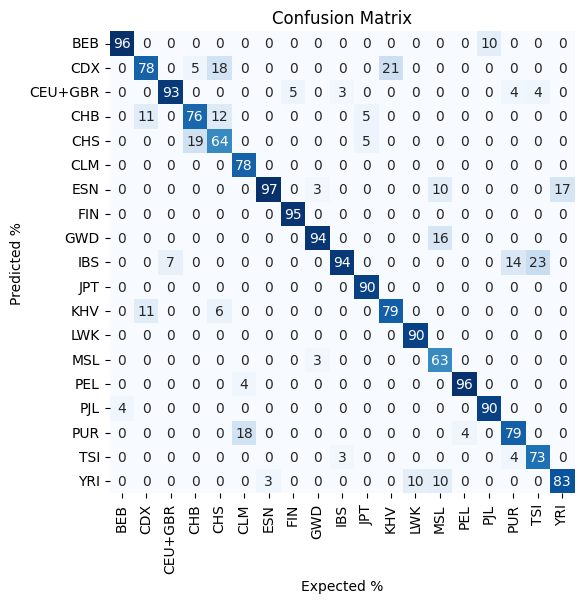

In [38]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels, fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Expected %')
plt.ylabel('Predicted %')
plt.show()

In [39]:
def get_power(df, degree=0):
    # df is a pandas dataframe of shape (n_classes, n_classes)
    # power: among the expected positive, how many are predicted related
    # rows are expected, columns are predicted
    expected_pos = df.iloc[degree, :].sum()
    predicted_pos = df.iloc[:, degree].sum()
    true_pos = df.iloc[degree, degree]
    predicted_unrelated = df.iloc[degree, 0].sum()
    power = 1 - (predicted_unrelated/expected_pos)
    recall = true_pos/expected_pos
    precision = true_pos/predicted_pos
    f1 = 2*precision*recall/(precision+recall)
    return power*100, recall*100, precision*100, f1*100


In [40]:
def get_F1_score(conf_mat):
    # conf_mat is a numpy array of shape (n_classes, n_classes)
    # rows are predicted, columns are expected
    # return a list of F1 scores for each class
    df = conf_mat.T # rows are expected, columns are predicted
    df = pd.DataFrame(df)
    F1_scores = []
    for i in range(df.shape[0]):
        F1_scores.append(get_power(df, i)[3])
    return F1_scores

f1 = get_F1_score(conf_mat)
# remove nan
f1 = [i for i in f1 if not np.isnan(i)]
[print(i,j) for i,j in zip(labels, f1)]

overall_F1 = np.mean(f1)
print(f'Overall F1 score: {overall_F1}')

BEB 93.35918565196316
CDX 70.21660649819495
CEU+GBR 88.70813397129187
CHB 74.559686888454
CHS 67.8038379530917
CLM 87.5140607424072
ESN 85.2603706972639
FIN 97.43589743589743
GWD 89.81921979067555
IBS 78.6705931846866
JPT 94.73684210526316
KHV 80.65173116089615
LWK 94.73684210526316
MSL 76.14457831325302
PEL 96.04010025062658
PJL 92.92720702116675
PUR 78.05362462760675
TSI 81.04793756967669
YRI 80.40540540540539
Overall F1 score: 84.63641375647812
